<a href="https://colab.research.google.com/github/Gecholus/LandmineDetection_SignalProccesing/blob/main/Landmine_detection_by_Pulseradar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load the data
file_path = 'MayınVerileri.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path, index_col=0)
df = df.reset_index(drop=True)

# Check the shape and first few rows of the DataFrame
print("DataFrame shape:", df.shape)
print(df.head(294))  # Print the first 10 rows to inspect


DataFrame shape: (294, 226)
     col1  col2  col3  col4  col5  col6  col7  col8  col9  col10  ...  col217  \
0       0     0     0     0     0     0     0     0     0      0  ...     0.0   
1       0     0     0     0     0     0     0     0     0      0  ...     0.0   
2       0     0     0     0     0     0     0     0     0      0  ...     0.0   
3       0     0     0     0     0     0     0     0     0      0  ...     0.0   
4       0     0     0     0     0     0     0     0     0      0  ...     0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...     ...   
289     0     0     0     0     0     0     0     0     0      0  ...     0.0   
290     0     0     0     0     0     0     0     0     0      0  ...     0.0   
291     0     0     0     0     0     0     0     0     0      0  ...     0.0   
292     0     0     0     0     0     0     0     0     0      0  ...     0.0   
293     0     0     0     0     0     0     0     0     0      0  ...     0.0   


In [ ]:
# Define features and labels
feature_columns = [f'col{i}' for i in range(1, 226)]  # Assuming columns are named col1 to col225
if not all(col in df.columns for col in feature_columns):
    print("Column names in the DataFrame do not match the expected feature column names.")
    print("Columns in DataFrame:", df.columns)
else:
    X = df[feature_columns]  # Features
    y = df['labels']  # Labels

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

    # Check the shapes of the split data
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    # Data preprocessing
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Calculate class weights for handling imbalanced classes
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights = {i: class_weights[i] for i in range(len(class_weights))}

    # Define the model architecture
    model = Sequential()
    model.add(Dense(256, activation='tanh', input_shape=(X_train.shape[1],)))  # Changed activation to 'tanh'
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='tanh'))  # Changed activation to 'tanh'
    model.add(Dense(128, activation='tanh'))  # Changed activation to 'tanh'
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test), class_weight=class_weights)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_scaled, y_test)
    print(f'Test loss: {loss:.4f}')
    print(f'Test accuracy: {accuracy:.4f}')

    # Make predictions
    predictions = model.predict(X_test_scaled)



X_train shape: (249, 225)
X_test shape: (45, 225)
y_train shape: (249,)
y_test shape: (45,)
Epoch 1/20
8/8 [==============================] - 1s 50ms/step - loss: 0.5997 - accuracy: 0.6546 - val_loss: nan - val_accuracy: 0.7556
Epoch 2/20
8/8 [==============================] - 0s 12ms/step - loss: 0.4188 - accuracy: 0.8233 - val_loss: nan - val_accuracy: 0.8444
Epoch 3/20
8/8 [==============================] - 0s 18ms/step - loss: 0.3313 - accuracy: 0.8996 - val_loss: nan - val_accuracy: 0.8667
Epoch 4/20
8/8 [==============================] - 0s 12ms/step - loss: 0.3034 - accuracy: 0.8675 - val_loss: nan - val_accuracy: 0.9111
Epoch 5/20
8/8 [==============================] - 0s 25ms/step - loss: 0.2355 - accuracy: 0.9317 - val_loss: nan - val_accuracy: 0.8889
Epoch 6/20
8/8 [==============================] - 0s 13ms/step - loss: 0.2057 - accuracy: 0.9237 - val_loss: nan - val_accuracy: 0.9111
Epoch 7/20
8/8 [==============================] - 0s 17ms/step - loss: 0.1556 - accuracy: 0.

2/2 [==============================] - 0s 15ms/step


# ÖĞRENME EĞRİSİNİN GÖSTERİMİ

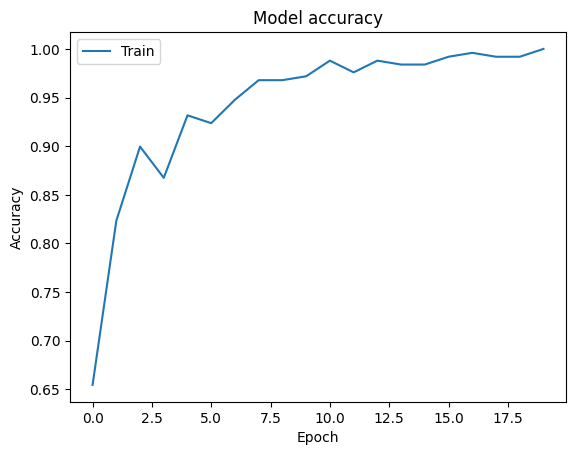

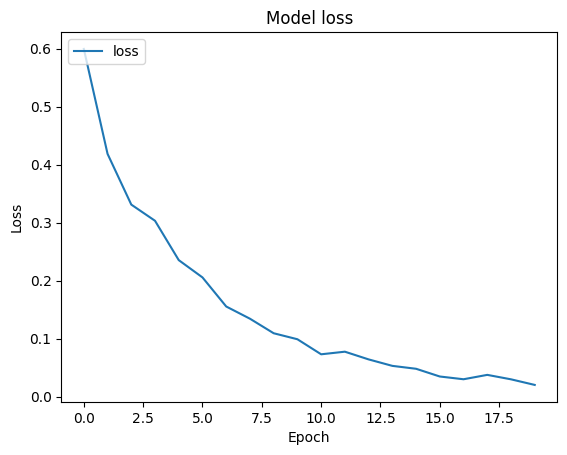

In [ ]:
plt.plot(history.history['accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

# SPESİFİK BİR TEST VERİ SETİ ELEMANININ İNCELENMESİ

<ipython-input-18-4189f4b60eb6>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(predicted_prob >= threshold)


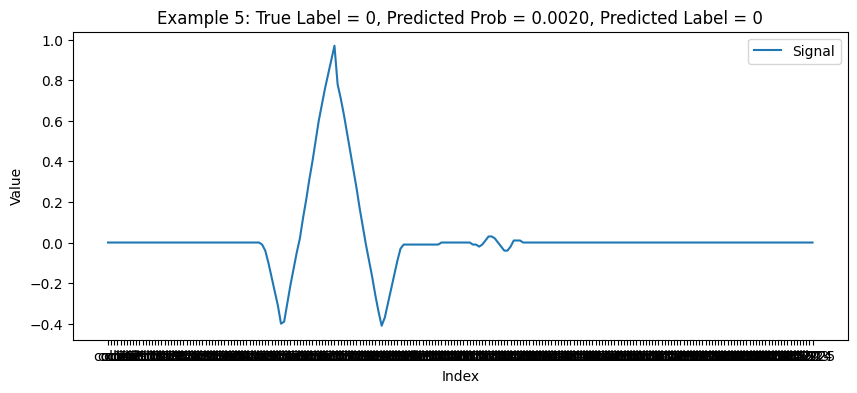

In [ ]:
def plot_example_with_features(index, threshold=0.5):
    raw_array = X_test.iloc[index]
    true_label = y_test.iloc[index]
    predicted_prob = predictions[index]  # Assuming predictions is a 1D array or list
    predicted_label = int(predicted_prob >= threshold)

    plt.figure(figsize=(10, 4))
    plt.plot(raw_array, label='Signal')

    # Highlight detected feature (both positive and negative parts)
    if predicted_label == 1:
        plt.fill_between(range(len(raw_array)), raw_array, where=(raw_array != 0), color='red', alpha=0.5, label='Detected Feature')

    # Convert predicted_prob to scalar if it's an array
    if isinstance(predicted_prob, np.ndarray):
        predicted_prob = predicted_prob[0]  # Take the first element (assuming binary classification)

    plt.title(f'Example {index}: True Label = {true_label}, Predicted Prob = {predicted_prob:.4f}, Predicted Label = {predicted_label}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(False)
    plt.show()

plot_example_with_features(5)  # Replace 0 with the index of the example you want to visualize



## TÜM VERİ SETİNDEN HERHANGİ BİR VERİNİN İNCELENMESİ

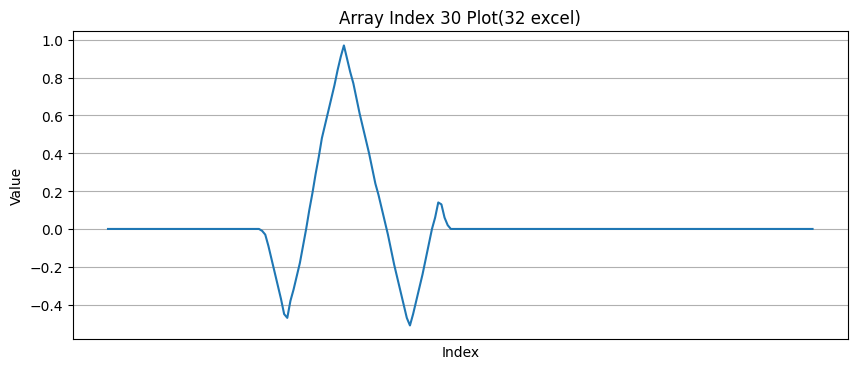

In [ ]:

# Plot one of the raw arrays
array_index = 30  # Change this to plot a different array
selected_array = X.iloc[array_index]

plt.figure(figsize=(10, 4))
plt.plot(selected_array)
plt.title(f'Array Index {array_index} Plot({array_index+2} excel)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.xticks([])  # Remove x-axis ticks
plt.grid(True)
plt.show()


# **TESPİTİ GEEÇEKLEŞEN VERİLERİ İNCELEME(İ SAYIDA)**


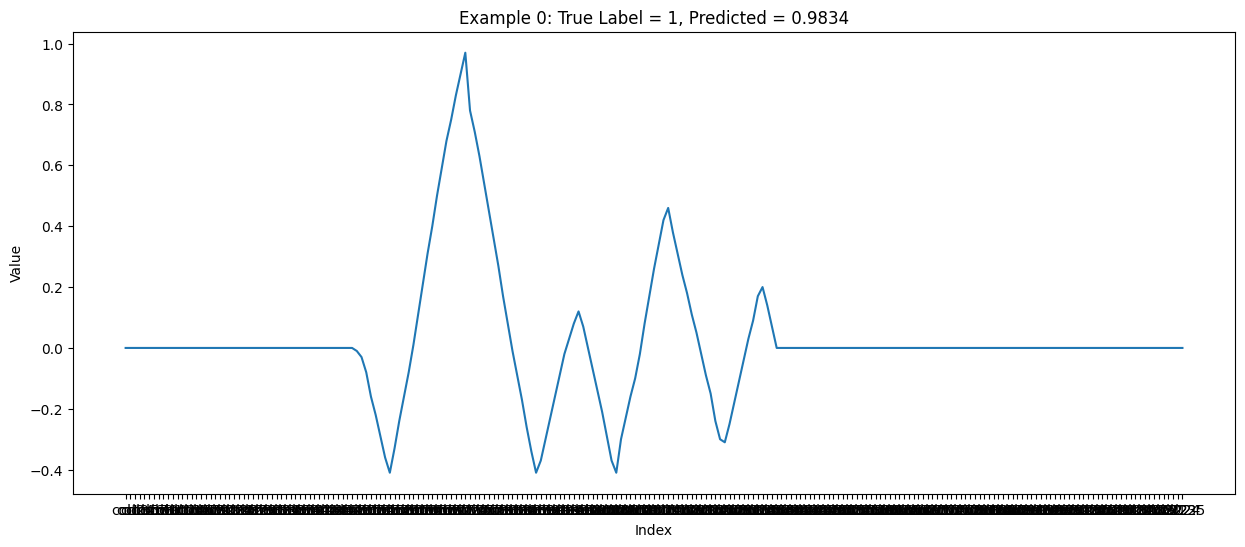

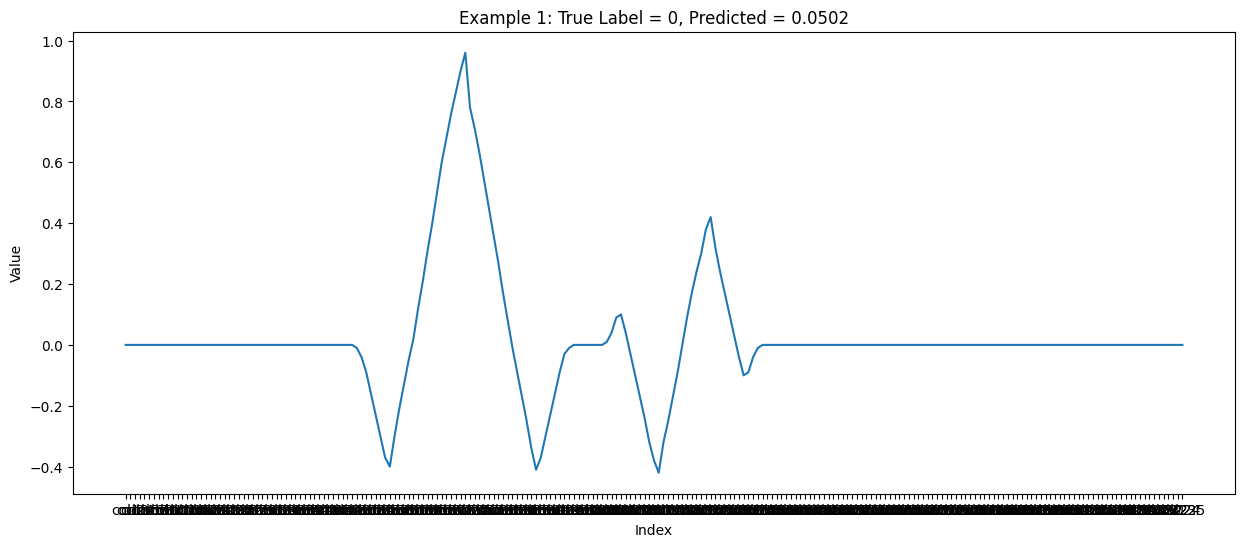

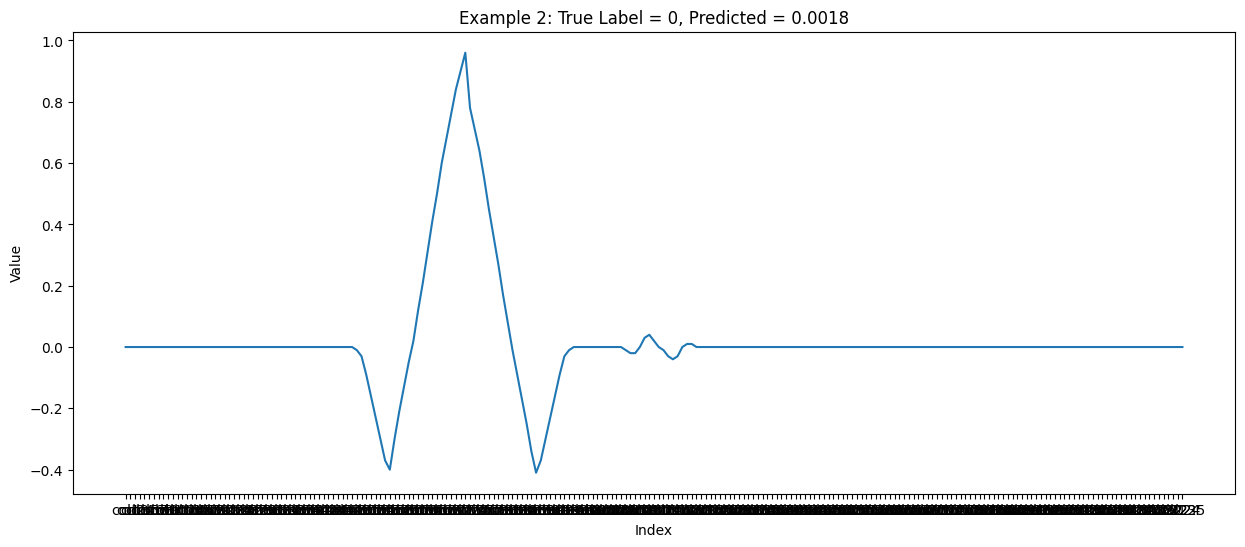

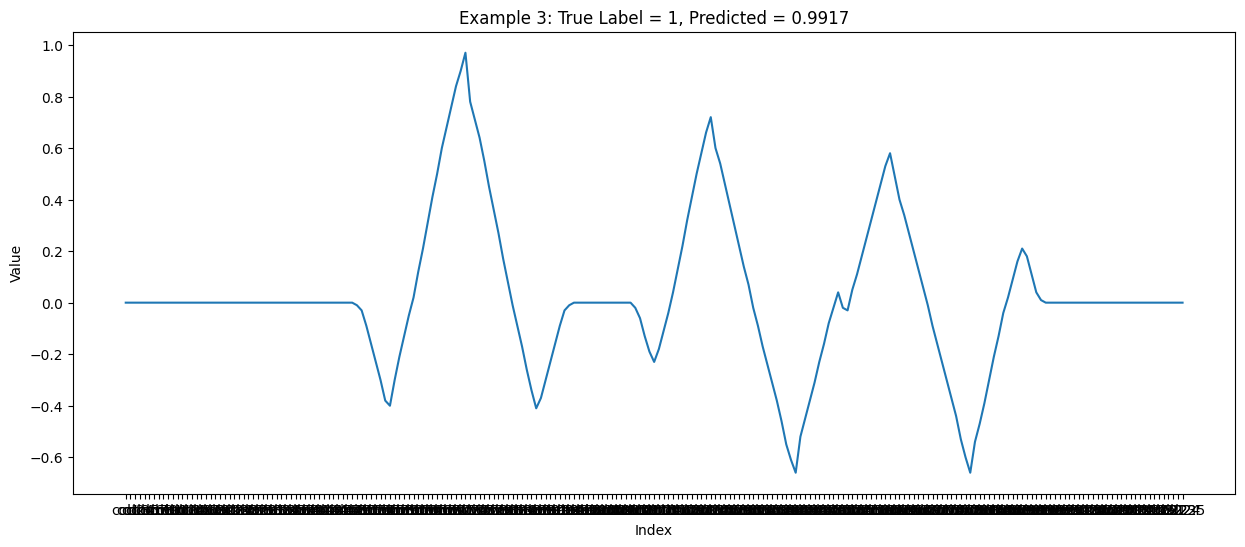

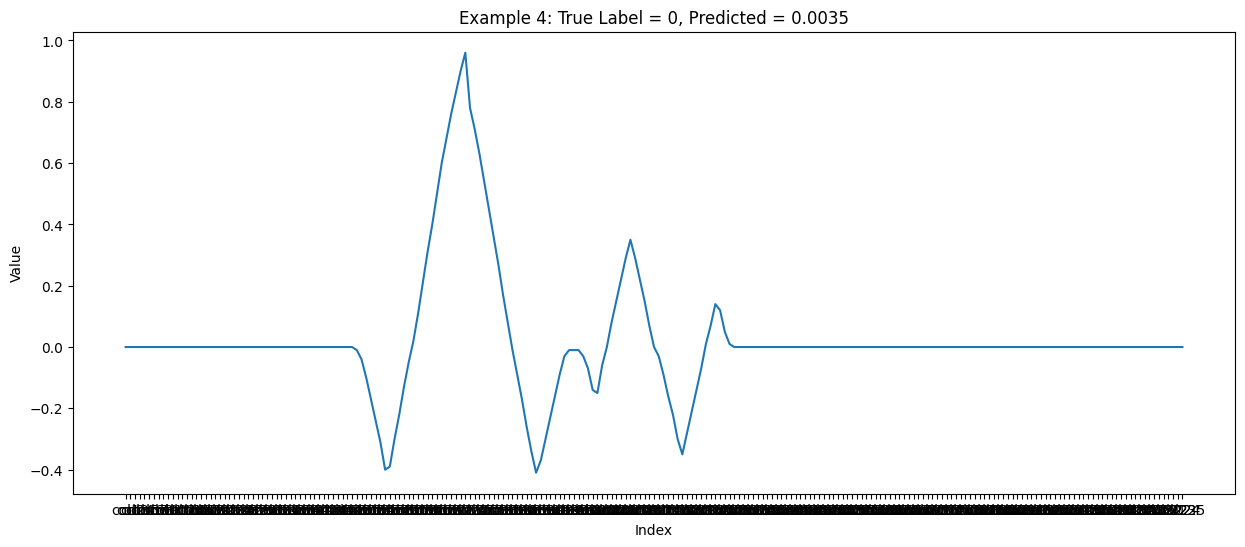

In [ ]:
 # Visualize individual test examples
def plot_example(index):
        raw_array = X_test.iloc[index]
        true_label = y_test.iloc[index]
        predicted_label = predictions[index][0]

        plt.figure(figsize=(15, 6))
        plt.plot(raw_array)
        plt.title(f'Example {index}: True Label = {true_label}, Predicted = {predicted_label:.4f}')
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.grid(False)
        plt.show()

    # Plot a few examples
for i in range(5):  # Change the range or specific indices as needed
        plot_example(i)

# **CONFUSION MATRIX**

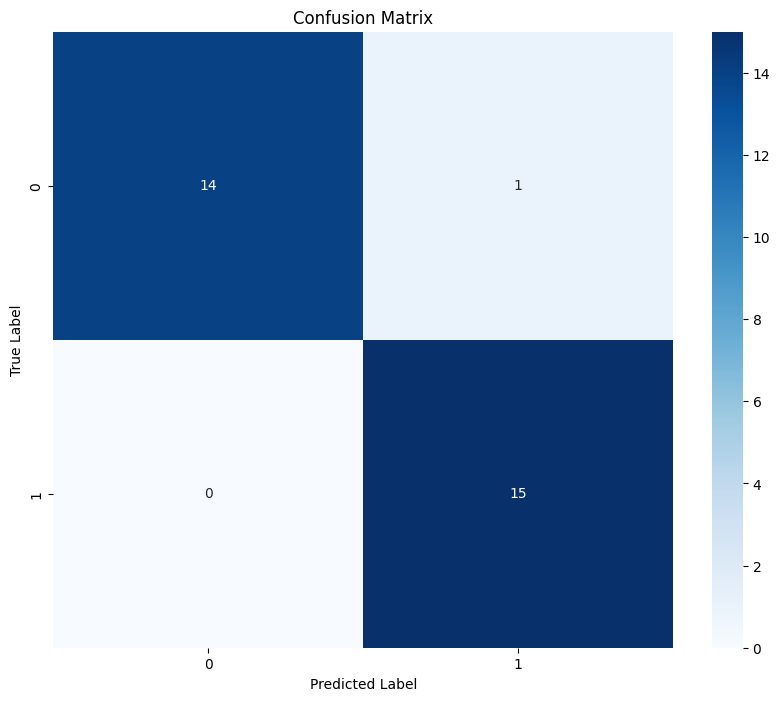

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predicted_labels))

# **yanlış tahmin edilen verilerin gösterimi**

Number of misclassified examples: 1
Index: 17, True Label: 0, Predicted Prob: 0.9998, Predicted Label: 1


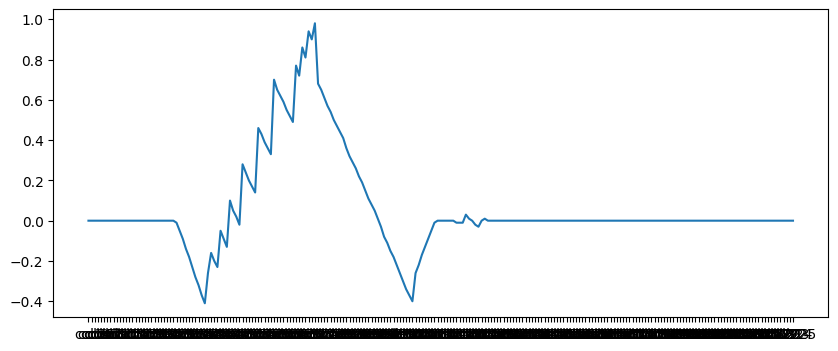

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the following variables from your trained model and test data
# X_test, y_test, predictions

# Convert predictions to binary labels
predicted_labels = (predictions >= 0.5).astype(int).flatten()

# Identify misclassified examples
misclassified_indices = np.where(predicted_labels != y_test.values)[0]

# Function to visualize misclassified examples
def plot_misclassified_example(index, threshold=0.5):
    raw_array = X_test.iloc[index]
    true_label = y_test.iloc[index]
    predicted_prob = predictions[index][0]
    predicted_label = int(predicted_prob >= threshold)

    plt.figure(figsize=(10, 4))
    plt.plot(raw_array, label='Signal')


# Print and plot misclassified examples
print(f"Number of misclassified examples: {len(misclassified_indices)}")
for i in misclassified_indices:
    true_label = y_test.iloc[i]
    predicted_prob = predictions[i][0]
    predicted_label = int(predicted_prob >= 0.5)
    print(f"Index: {i}, True Label: {true_label}, Predicted Prob: {predicted_prob:.4f}, Predicted Label: {predicted_label}")
    plot_misclassified_example(i)
